# Voluntary Problem Set

This problem set allows you to play around with concepts from class and to solve some smaller problems on your own.

# Topic: 2nd Moment and First Moment Shocks to Equity returns

you will learn about

- Measuring Uncertainty in Equity Markets
- Gram-Schmidt Orthogonalization
- AR(1) regressions
- principal component analysis
- fitting stochastic volatility models
- extracting volatility shocks
- testing the so called 'spanning hypothesis' for equity volatility

# Tasks



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller


We want to learn about the similarity and dissimilarity of US and EU uncertainty. Moreover, we want to learn whether return shocks span volatility shocks.

**Hint:** When working with principal components, use normalized data (i.e. 'z')
$$
\\
$$

**A. Load-in US and EU data**. 

- ignore the equal weight portfolio (i.e. focus on individual stocks only) 

- Ensure that start and end date are aligned across both data sets 
Hint: (i.e. Full Outer Joint) 
https://www.datacamp.com/community/tutorials/joining-dataframes-pandas

 
$$
\\
$$

In [2]:
us = pd.read_csv("r_SP500_d_cleaned_Dec2020.csv", parse_dates=True, index_col=0)
eu = pd.read_csv("r_ES50_d_cleaned_realized_Nov2020.csv", parse_dates=True, index_col=0)

In [3]:
data = pd.merge(us, eu.iloc[:,:-1], on="Date", how="inner")

In [4]:
us = data.iloc[:,:377]
eu = data.iloc[:,377:]


**B. Extract the first two principal components of the international return panel. Ensure that these are displayed with a mean of zero and a unit volatility**

- How important are the first and the second principal components?

- Plot the time series of both principal components


$$
\\
$$


In [5]:
pca = PCA(n_components=1)
pca_int_ts = pca.fit(stats.zscore(data))
print(np.round(pca_int_ts.explained_variance_ratio_,2))

[0.33]


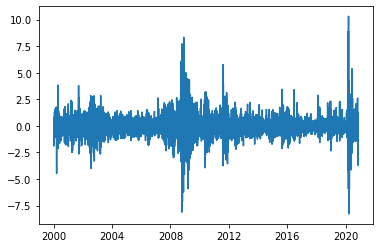

In [6]:
pc1_int = stats.zscore(pca.transform(stats.zscore(data)))
plt.plot(data.index, pc1_int);


**C. Compute PC1 of the EU returns and PC1 of the US returns. Ensure that these are displayed with a mean of zero and a unit volatility.**

- Plot both PCs

-  How large is the unconditional correlation of the EU and the US first principal component of returns?

- Regress PC1 of the international return panel onto PC1 of EU equity. How large ist the adj-R2? How large are the point estimates and t-stats?

- Regress PC1 of the international return panel onto the Gram-Schmidt orthogonalized first principal components of US and EU equity. Treat the common information in PC1(US equity) and PC1(EU equity) as US only information. How much additional variance explained does EU information (that is orthogonal to US information) add for explaining variations in PC1 of the international return panel?

Hint on Gram-Schmidt: See example 6:35min/8:11min in https://www.youtube.com/watch?v=4Rzn-Pfvof4&list=PLyQSjcv8LwAHcUWCG-zRWbzuczxa0hB3n&index=3

- Regress PC1 of the international return panel onto PC1 of US equity. How large ist the adj-R2? How large are the point estimates and t-stats?
    
$$
\\
$$

[0.45]


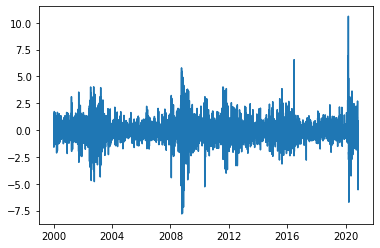

In [7]:
pca = PCA(n_components=1)
pca_eu_ts = pca.fit(stats.zscore(eu))
print(np.round(pca_eu_ts.explained_variance_ratio_,2))
pc1_eu = stats.zscore(pca.transform(stats.zscore(eu)))
plt.plot(eu.index, pc1_eu);

[0.35]


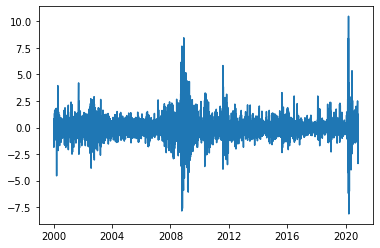

In [8]:
pca = PCA(n_components=1)
pca_us_ts = pca.fit(stats.zscore(us))
print(np.round(pca_us_ts.explained_variance_ratio_,2))
pc1_us = stats.zscore(pca.transform(stats.zscore(us)))
plt.plot(us.index, pc1_us);

In [9]:
np.round(np.corrcoef(pc1_us.T,pc1_eu.T)[0][1],2)

0.61

In [154]:
X = pc1_int[:,0]
X = sm.add_constant(X)
y = pc1_us[:,0]
linReg = sm.GLS(y,X)
output = linReg.fit()
eps_us = y - output.fittedvalues.reshape(-1,1)
print(output.summary())
print(np.round(output.rsquared_adj,2))
print(np.round(output.params[1],2))
print(np.round(output.tvalues[1],2))

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            GLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 9.712e+05
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        00:18:57   Log-Likelihood:                 6251.0
No. Observations:                5224   AIC:                        -1.250e+04
Df Residuals:                    5222   BIC:                        -1.248e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.511e-18      0.001   8.41e-15      1.0

In [151]:
X = pc1_int[:,0]
X = sm.add_constant(X)
y = pc1_eu[:,0]
linReg = sm.GLS(y,X)
output = linReg.fit()
eps_eu = y - output.fittedvalues.reshape(-1,1)
#print(output.summary()) 
print(np.round(output.rsquared_adj,2))
print(np.round(output.params[1],2))
print(np.round(output.tvalues[1],2))          

0.44
0.66
64.09


Regress us onto eu to get orthogonal information, then regress international onto orthogonal information

In [12]:
X = pc1_us 
X = sm.add_constant(X)
y = pc1_eu
linReg = sm.GLS(y,X)
output = linReg.fit()
eps = y - output.fittedvalues.reshape(-1,1)

In [13]:
X = pc1_int
X = sm.add_constant(X)
y = eps
linReg = sm.GLS(y,X)
output = linReg.fit()
#print(output.summary())
print(np.round(output.rsquared_adj,2))

0.01




**D.  Filter time-series of variance** for
\begin{itemize}
\item PC1(international equity)  
\item PC1(US equity)
\item PC1(EU equity)
\end{itemize}
using univariate stochastic volatility models.

- What are the pariwise correlations of the respective variances? Interpret results.

- Plot the filtered variances in one graph. Looking at uncertainties, which currency area was the epicenter of the Covid pandemic?
$$
\\
$$

## STOCHASTIC VOL

In [14]:
from ipynb.fs.defs.Helper_SVM_Harvey import QLSV

In [15]:
def getStochasticVol(data):
    SVM = QLSV(data)
    SVM_result = SVM.fit(cov_type='robust')
    print(SVM_result.summary())
    var_data = np.exp(SVM_result.smoothed_state[0]/2)
    shock_data = SVM_result.smoothed_state_disturbance[0]
    return(var_data,shock_data)

In [16]:
SVM = QLSV(pc1_us)
SVM_result = SVM.fit(cov_type='robust')

In [17]:
print(SVM_result.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5224
Model:                           QLSV   Log Likelihood              -11837.414
Date:                Wed, 27 Jan 2021   AIC                          23680.827
Time:                        23:21:44   BIC                          23700.510
Sample:                             0   HQIC                         23687.710
                               - 5224                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.9837      0.004    256.325      0.000       0.976       0.991
sigma2_eta     0.0361      0.007      4.896      0.000       0.022       0.051
mu            -0.7732      0.165     -4.698      0.0

In [18]:
(var_pc1_int, shock_pc1_int) = getStochasticVol(pc1_int - pc1_int.mean())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5224
Model:                           QLSV   Log Likelihood              -11845.468
Date:                Wed, 27 Jan 2021   AIC                          23696.937
Time:                        23:21:45   BIC                          23716.620
Sample:                             0   HQIC                         23703.820
                               - 5224                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.9843      0.004    270.434      0.000       0.977       0.991
sigma2_eta     0.0346      0.007      4.880      0.000       0.021       0.048
mu            -0.7721      0.167     -4.617      0.0

In [19]:
(var_pc1_us, shock_pc1_us) = getStochasticVol(pc1_us - pc1_us.mean())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5224
Model:                           QLSV   Log Likelihood              -11837.414
Date:                Wed, 27 Jan 2021   AIC                          23680.827
Time:                        23:21:46   BIC                          23700.510
Sample:                             0   HQIC                         23687.710
                               - 5224                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.9837      0.004    256.325      0.000       0.976       0.991
sigma2_eta     0.0361      0.007      4.896      0.000       0.022       0.051
mu            -0.7732      0.165     -4.698      0.0

In [20]:
(var_pc1_eu, shock_pc1_eu) = getStochasticVol(pc1_eu- pc1_eu.mean())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 5224
Model:                           QLSV   Log Likelihood              -11721.316
Date:                Wed, 27 Jan 2021   AIC                          23448.633
Time:                        23:21:47   BIC                          23468.316
Sample:                             0   HQIC                         23455.516
                               - 5224                                         
Covariance Type:               robust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
phi            0.9854      0.004    280.229      0.000       0.978       0.992
sigma2_eta     0.0266      0.006      4.571      0.000       0.015       0.038
mu            -0.5692      0.155     -3.669      0.0

In [21]:
np.round(np.corrcoef(var_pc1_us,var_pc1_int)[0][1],2)

0.99

In [22]:
np.round(np.corrcoef(var_pc1_eu,var_pc1_int)[0][1],2)

0.82

In [23]:
np.round(np.corrcoef(var_pc1_us,var_pc1_eu)[0][1],2)

0.8

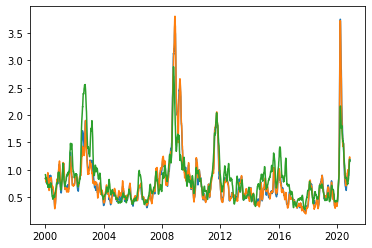

In [24]:
plt.plot(data.index,var_pc1_int);
plt.plot(data.index,var_pc1_us);
plt.plot(data.index,var_pc1_eu);

**E. Extract the time-series of volatility shocks** for

\begin{itemize}
\item PC1(international equity)  
\item PC1(US equity)
\item PC1(EU equity)
\end{itemize}

Hint: look carefully at the parametrization of a SVM.

- By how much do US volatility shocks outweigh ES volatility shocks?  

- What are the pairwise correlations of volatility shocks?



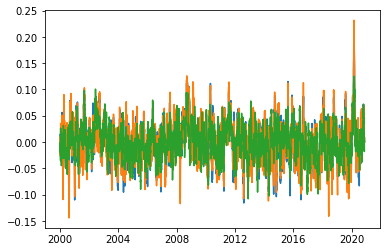

In [25]:
plt.plot(data.index,shock_pc1_int)
plt.plot(data.index,shock_pc1_us)
plt.plot(data.index,shock_pc1_eu)

In [26]:
np.round(np.corrcoef(shock_pc1_us,shock_pc1_int)[0][1],2)

0.95

In [27]:
np.round(np.corrcoef(shock_pc1_eu,shock_pc1_int)[0][1],2)

0.56

In [28]:
np.round(np.corrcoef(shock_pc1_us,shock_pc1_eu)[0][1],2)

0.53

In [29]:
np.round(( shock_pc1_us.mean() - shock_pc1_eu.mean()) /shock_pc1_eu.mean() ,2)

0.17


**F. Extract the time-series of return shocks** for 
\begin{itemize}
\item PC1(international equity)  
\item PC1(US equity)
\item PC1(EU equity)
\end{itemize}

What are the pariwise correlations of the return shocks? Interpret results.
 
Hint: Assume the mean equation for these quantities follows an AR(1). 
$$
\\
$$

In [100]:
def getReturnShock(r):
    y = r[:-1,0]
    X = np.ones((y.shape[0], 2))
    X[:,1] = r[1:,0]
    ar1 = sm.OLS(y,X).fit()
    eps = ar1.resid
    return eps

In [101]:
r_shock_int = getReturnShock(pc1_int)
r_shock_us  = getReturnShock(pc1_us)
r_shock_eu  = getReturnShock(pc1_eu)

In [102]:
np.round(np.corrcoef(r_shock_us,r_shock_int)[0][1],2)

1.0

In [103]:
np.round(np.corrcoef(r_shock_eu,r_shock_int)[0][1],2)

0.66

In [104]:
np.round(np.corrcoef(r_shock_us,r_shock_eu)[0][1],2)

0.61

In [57]:
from arch import arch_model

In [105]:
am = arch_model(pc1_int, lags=1, mean="AR", vol="Garch", dist="Normal", rescale=False)
res = am.fit();
resid_int = res.resid[1:]

Iteration:      1,   Func. Count:      7,   Neg. LLF: 15503556703.167318
Iteration:      2,   Func. Count:     18,   Neg. LLF: 13814121245.917612
Iteration:      3,   Func. Count:     28,   Neg. LLF: 63879821.98838189
Iteration:      4,   Func. Count:     36,   Neg. LLF: 8835.799335694224
Iteration:      5,   Func. Count:     44,   Neg. LLF: 6007.601749991869
Iteration:      6,   Func. Count:     51,   Neg. LLF: 5920.666752223273
Iteration:      7,   Func. Count:     58,   Neg. LLF: 6186.717353123806
Iteration:      8,   Func. Count:     65,   Neg. LLF: 5901.007056720851
Iteration:      9,   Func. Count:     71,   Neg. LLF: 5900.915850252202
Iteration:     10,   Func. Count:     78,   Neg. LLF: 5900.531302383272
Iteration:     11,   Func. Count:     84,   Neg. LLF: 5900.444716954909
Iteration:     12,   Func. Count:     90,   Neg. LLF: 5900.444558680429
Iteration:     13,   Func. Count:     96,   Neg. LLF: 5900.44455755525
Iteration:     14,   Func. Count:    101,   Neg. LLF: 5900.4445

In [106]:
am = arch_model(pc1_us, lags=1, mean="AR", vol="Garch", dist="Normal", rescale=False)
res = am.fit();
resid_us = res.resid[1:]

Iteration:      1,   Func. Count:      7,   Neg. LLF: 911105883449050.8
Iteration:      2,   Func. Count:     18,   Neg. LLF: 95236139279034.08
Iteration:      3,   Func. Count:     28,   Neg. LLF: 3055093725.882182
Iteration:      4,   Func. Count:     36,   Neg. LLF: 8725.100830235873
Iteration:      5,   Func. Count:     44,   Neg. LLF: 5981.6177453108685
Iteration:      6,   Func. Count:     51,   Neg. LLF: 5891.157250079663
Iteration:      7,   Func. Count:     58,   Neg. LLF: 6168.956175351739
Iteration:      8,   Func. Count:     65,   Neg. LLF: 5870.423317924852
Iteration:      9,   Func. Count:     72,   Neg. LLF: 5870.354939897565
Iteration:     10,   Func. Count:     79,   Neg. LLF: 5869.677567488343
Iteration:     11,   Func. Count:     85,   Neg. LLF: 5869.677284437765
Iteration:     12,   Func. Count:     90,   Neg. LLF: 5869.677284437341
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5869.677284437765
            Iterations: 12


In [107]:
am = arch_model(pc1_eu, lags=1, mean="AR", vol="Garch", dist="Normal", rescale=False)
res = am.fit();
resid_eu = res.resid[1:]

Iteration:      1,   Func. Count:      7,   Neg. LLF: 7909041665.874771
Iteration:      2,   Func. Count:     17,   Neg. LLF: 35263595938.562164
Iteration:      3,   Func. Count:     27,   Neg. LLF: 487537908.38411987
Iteration:      4,   Func. Count:     36,   Neg. LLF: 9447.695059704725
Iteration:      5,   Func. Count:     44,   Neg. LLF: 267794580.75846747
Iteration:      6,   Func. Count:     52,   Neg. LLF: 6416.60052143836
Iteration:      7,   Func. Count:     59,   Neg. LLF: 6351.370833195678
Iteration:      8,   Func. Count:     66,   Neg. LLF: 6489.575367304782
Iteration:      9,   Func. Count:     73,   Neg. LLF: 6351.980040491511
Iteration:     10,   Func. Count:     80,   Neg. LLF: 6345.740619931731
Iteration:     11,   Func. Count:     87,   Neg. LLF: 6345.6421986624155
Iteration:     12,   Func. Count:     93,   Neg. LLF: 6345.6421343426055
Iteration:     13,   Func. Count:     98,   Neg. LLF: 6345.642134339381
Optimization terminated successfully    (Exit mode 0)
      

In [108]:
np.round(np.corrcoef(resid_us,resid_int)[0][1],2)

1.0

In [109]:
np.round(np.corrcoef(resid_eu,resid_int)[0][1],2)

0.66

In [110]:
np.round(np.corrcoef(resid_us,resid_eu)[0][1],2)

0.61


**G. Do return shocks span volatility shocks? To answer the question, regress volatility shocks** of
\begin{itemize}
\item PC1(international equity)  
\item PC1(US equity)
\item PC1(EU equity)
\end{itemize}

onto their respective return shocks. How large are the respective R2, point (t-stat) estimates? Interpret results.

In [134]:
resid_eu.std()

0.9998574416167957

In [133]:
r_shock_eu.mean

0.9999390796641463

In [147]:
X = shock_pc1_int[1:]
X = sm.add_constant(X)
y = r_shock_int
linReg = sm.GLS(y,X)
output = linReg.fit()
print(output.summary())
print(np.round(output.rsquared_adj,2))
print(np.round(output.params[1],2))
print(np.round(output.tvalues[1],2))

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            GLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     98.02
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           6.59e-23
Time:                        00:11:17   Log-Likelihood:                -7352.4
No. Observations:                5223   AIC:                         1.471e+04
Df Residuals:                    5221   BIC:                         1.472e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.014      0.044      0.9

In [146]:
X = shock_pc1_us[1:]
X = sm.add_constant(X)
y = r_shock_us
linReg = sm.GLS(y,X)
output = linReg.fit()
print(output.summary())
print(np.round(output.rsquared_adj,2))
print(np.round(output.params[1],2))
print(np.round(output.tvalues[1],2))

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            GLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     92.94
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           8.19e-22
Time:                        00:11:09   Log-Likelihood:                -7346.8
No. Observations:                5223   AIC:                         1.470e+04
Df Residuals:                    5221   BIC:                         1.471e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.014      0.041      0.9

In [145]:
X = shock_pc1_eu[1:]
X = sm.add_constant(X)
y = r_shock_eu
linReg = sm.GLS(y,X)
output = linReg.fit()
print(output.summary())
print(np.round(output.rsquared_adj,2))
print(np.round(output.params[1],2))
print(np.round(output.tvalues[1],2))

                            GLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            GLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     103.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):           5.60e-24
Time:                        00:11:01   Log-Likelihood:                -7359.8
No. Observations:                5223   AIC:                         1.472e+04
Df Residuals:                    5221   BIC:                         1.474e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.014      0.046      0.9